In [73]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [74]:
df = pd.read_csv("facebook_twitter_scores.csv")
df.head()

,0,1,compound,positive,negative,neutral
0,2018-06-16 17:40:46,"b""RT @BarrettBrown_: My thanks to the 130 back...",0.4404,0.127,0.0,0.873
1,2018-06-16 17:40:15,b'RT @followerzUK: 3 Factors You Should Look F...,0.0000,0.000,0.0,1.000
2,2018-06-16 17:40:04,b'Is #Facebook the future of #TV?...Facebook W...,0.0000,0.000,0.0,1.000
3,2018-06-16 17:39:54,b'RT @followerzUK: Facebook Marketing Means En...,0.6369,0.256,0.0,0.744
4,2018-06-16 17:39:36,b'RT @Anncostanza1: @realDonaldTrump This is b...,0.3367,0.107,0.0,0.893


In [75]:
#df = df[df["0"] != "e brokers"]

In [76]:
datetime.strptime('2018-06-15 02:05:16', '%Y-%m-%d %H:%M:%S')

datetime.datetime(2018, 6, 15, 2, 5, 16)

In [77]:
df['0'] = df['0'].map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [78]:
df["date"] = df["0"].map(lambda x: datetime.date(x))
df["time"] = df["0"].map(lambda x: datetime.time(x))
df.head()

,0,1,compound,positive,negative,neutral,date,time
0,2018-06-16 17:40:46,"b""RT @BarrettBrown_: My thanks to the 130 back...",0.4404,0.127,0.0,0.873,2018-06-16,17:40:46
1,2018-06-16 17:40:15,b'RT @followerzUK: 3 Factors You Should Look F...,0.0000,0.000,0.0,1.000,2018-06-16,17:40:15
2,2018-06-16 17:40:04,b'Is #Facebook the future of #TV?...Facebook W...,0.0000,0.000,0.0,1.000,2018-06-16,17:40:04
3,2018-06-16 17:39:54,b'RT @followerzUK: Facebook Marketing Means En...,0.6369,0.256,0.0,0.744,2018-06-16,17:39:54
4,2018-06-16 17:39:36,b'RT @Anncostanza1: @realDonaldTrump This is b...,0.3367,0.107,0.0,0.893,2018-06-16,17:39:36


In [79]:
df["hour"] = df['time'].map(lambda x: x.hour)
df['day'] = df['date'].map(lambda x: x.day)

In [80]:
df.head()

,0,1,compound,positive,negative,neutral,date,time,hour,day
0,2018-06-16 17:40:46,"b""RT @BarrettBrown_: My thanks to the 130 back...",0.4404,0.127,0.0,0.873,2018-06-16,17:40:46,17,16
1,2018-06-16 17:40:15,b'RT @followerzUK: 3 Factors You Should Look F...,0.0000,0.000,0.0,1.000,2018-06-16,17:40:15,17,16
2,2018-06-16 17:40:04,b'Is #Facebook the future of #TV?...Facebook W...,0.0000,0.000,0.0,1.000,2018-06-16,17:40:04,17,16
3,2018-06-16 17:39:54,b'RT @followerzUK: Facebook Marketing Means En...,0.6369,0.256,0.0,0.744,2018-06-16,17:39:54,17,16
4,2018-06-16 17:39:36,b'RT @Anncostanza1: @realDonaldTrump This is b...,0.3367,0.107,0.0,0.893,2018-06-16,17:39:36,17,16


In [81]:
df['day'].unique()

array([16, 15, 14], dtype=int64)

In [82]:
friday = df[df["day"] == 15]

In [87]:
friday.head()

,0,1,compound,positive,negative,neutral,date,time,hour,day
3302,2018-06-15 23:59:50,b'RT @ShujaRabbani: My Facebook notifications ...,0.0,0.0,0.0,1.0,2018-06-15,23:59:50,23,15
3303,2018-06-15 23:59:40,b'Our content got reported by a member #Win4Ne...,0.0,0.0,0.0,1.0,2018-06-15,23:59:40,23,15
3304,2018-06-15 23:59:21,b'Have I ever told you that I have never had a...,0.0,0.0,0.0,1.0,2018-06-15,23:59:21,23,15
3305,2018-06-15 23:58:58,b'RT @carlosdepaula1: Did you know anybody can...,0.0,0.0,0.0,1.0,2018-06-15,23:58:58,23,15
3306,2018-06-15 23:58:43,b'RT @ShujaRabbani: My Facebook notifications ...,0.0,0.0,0.0,1.0,2018-06-15,23:58:43,23,15


In [97]:
friday_morning = friday.query('hour >= 9 & hour <= 10')


(array([32000., 33000., 34000., 35000., 36000., 37000., 38000., 39000.,
        40000.]), <a list of 9 Text xticklabel objects>)

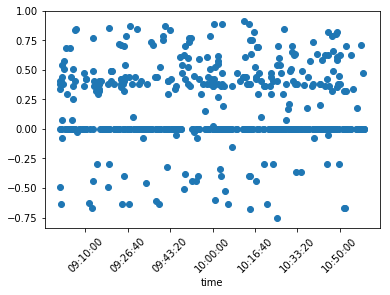

In [107]:
plt.plot_date(friday_morning['time'], friday_morning['compound'])
plt.xticks(rotation=45)

In [67]:
friday_means = friday.groupby(friday['hour']).mean()
friday_means = friday_means.reset_index()

(-0.5, 0.5)

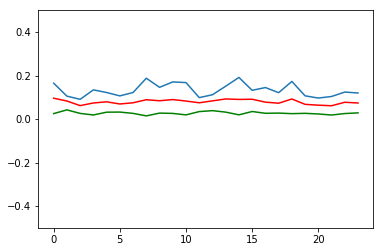

In [70]:
plt.plot(friday_means['hour'], friday_means['compound'])
plt.plot(friday_means['hour'], friday_means['positive'], color='r')
plt.plot(friday_means['hour'], friday_means['negative'], color='g')
plt.ylim(-0.5,0.5)


In [9]:
mean_by_hour = df.groupby(df['hour']).mean()
mean_by_hour

,compound,positive,negative,neutral,hour,day
hour,,,,,,
0,0.116042,0.079986,0.029359,0.890657,0.0,15.444751
1,0.108751,0.074486,0.034790,0.890719,1.0,15.417614
2,0.098951,0.065330,0.023626,0.911043,2.0,15.371014
3,0.131055,0.077188,0.023204,0.899599,3.0,15.502762
4,0.095426,0.068989,0.033034,0.897977,4.0,15.432665
5,0.102843,0.063736,0.025492,0.910772,5.0,15.434650
6,0.112800,0.070836,0.026156,0.902988,6.0,15.461538
7,0.085254,0.069895,0.036274,0.893816,7.0,15.501071
8,0.063723,0.073202,0.044374,0.882423,8.0,15.500978


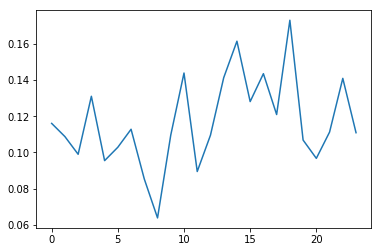

In [10]:
plt.plot(mean_by_hour['hour'], mean_by_hour['compound'])
plt.show()

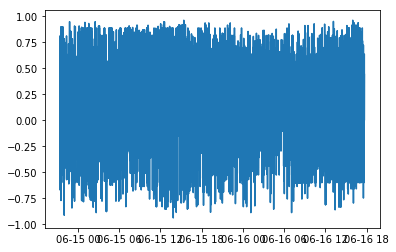

In [11]:
plt.plot(df['0'], df['compound'])
plt.figure(figsize=(20,3))
plt.savefig('text.png')
plt.show ()